# Plotting of `Population` Objects
This notebook demonstrates some of the functions available in ParetoBench for plotting the data in `Population` objects.

In [1]:
import paretobench as pb
from paretobench.plotting import (
    population_dvar_pairs,
    population_obj_scatter,
)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load some data to plot
exp = pb.Experiment.load("data/for_plotting.h5")

## Plotting the Objectives
The following cell demonstrates a few options for plotting the objectives from a population object.

Text(0.5, 1.0, 'Specify Pareto Front Manually')

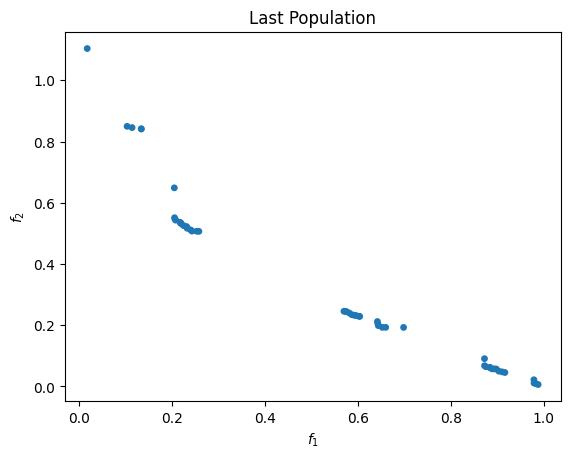

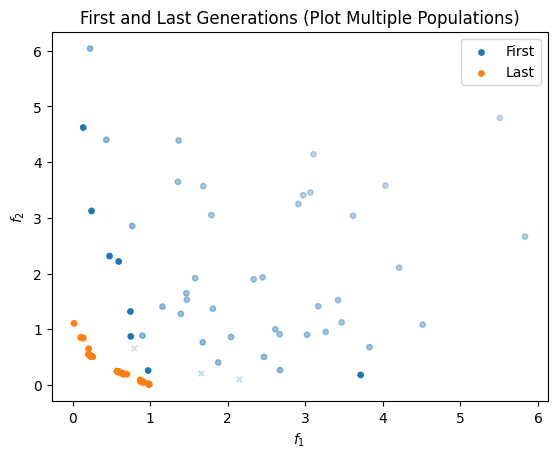

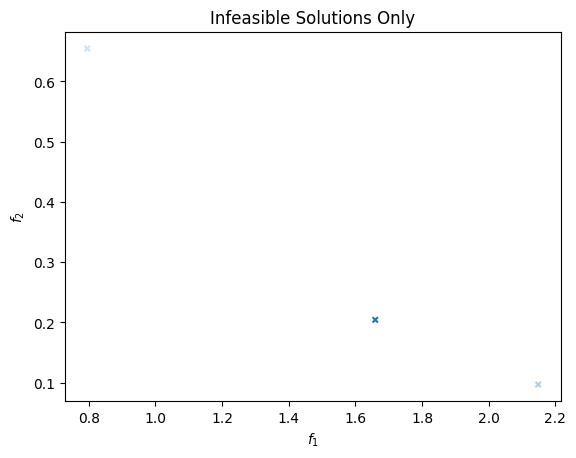

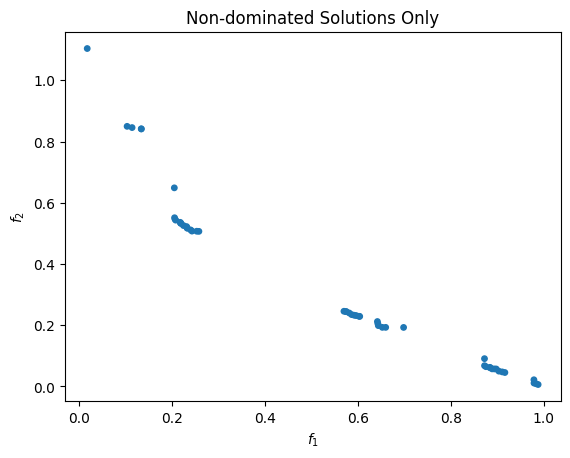

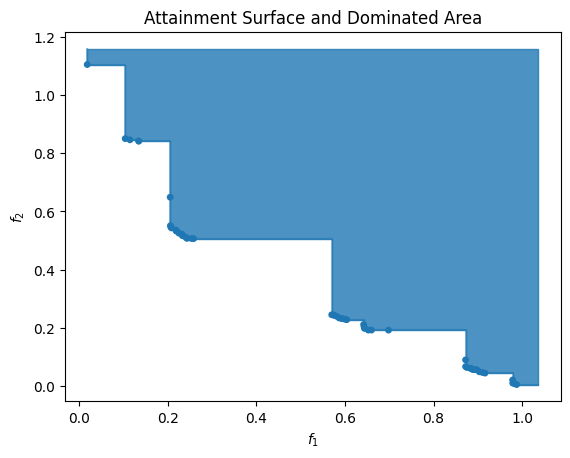

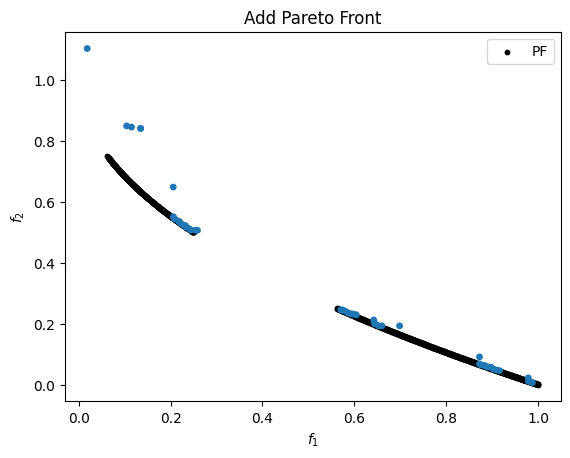

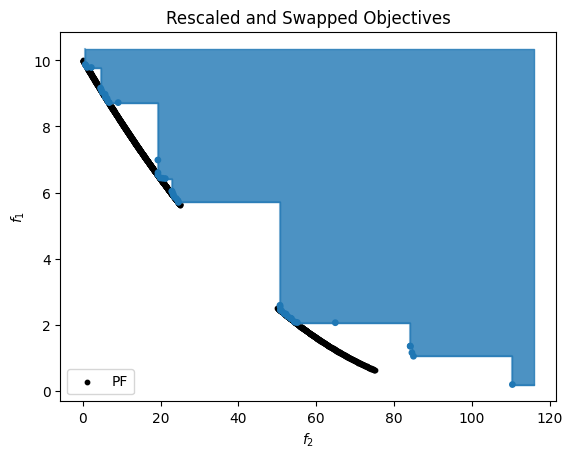

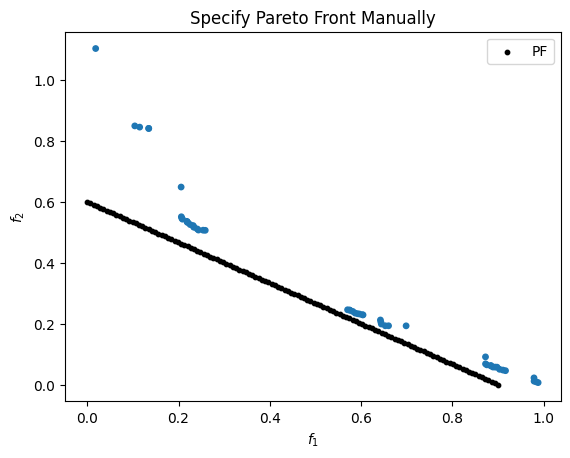

In [3]:
# Get the first and last generation from our 2D problem
idx = 0
first_pop = exp.runs[idx].reports[0]
last_pop = exp.runs[idx].reports[-1]

# Plot the objectives with default parameters. The dominated solutions are
# shown with some transparency according to domination rank to distinguish them
population_obj_scatter(last_pop)
plt.title("Last Population")

# Plot the first generation to demonstrate what infeasible solutions look like and show multiple plotting
fig, ax = population_obj_scatter(first_pop, label="First")
population_obj_scatter(last_pop, fig, ax, label="Last")
plt.title("First and Last Generations (Plot Multiple Populations)")
plt.legend()

# Show off the infeasible solutions
population_obj_scatter(first_pop, feasibility_filt="infeasible")
plt.title("Infeasible Solutions Only")

# Don't plot the dominated solutions
population_obj_scatter(last_pop, domination_filt="non-dominated")
plt.title("Non-dominated Solutions Only")

# Add the attainment surface
population_obj_scatter(last_pop, show_attainment=True, show_dominated_area=True)
plt.title("Attainment Surface and Dominated Area")

# Let's add the analytical Pareto front to it
population_obj_scatter(last_pop, problem=exp.runs[idx].problem)
plt.title("Add Pareto Front")

# Show scaling and flipping the objectives
population_obj_scatter(
    last_pop,
    show_attainment=True,
    show_dominated_area=True,
    problem=exp.runs[idx].problem,
    scale=(10, 100),
    flip_objs=True,
)
plt.title("Rescaled and Swapped Objectives")

# Can also manually specify the objecitves if not using a standard problem
pf = np.column_stack((np.linspace(0, 0.9, 128), np.linspace(0.6, 0, 128)))
population_obj_scatter(last_pop, pf_objectives=pf)
plt.title("Specify Pareto Front Manually")

CPU times: total: 641 ms
Wall time: 661 ms


Text(0.5, 0.92, 'Attainment Surface and Scaling')

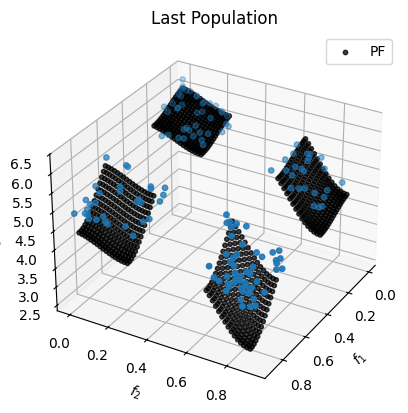

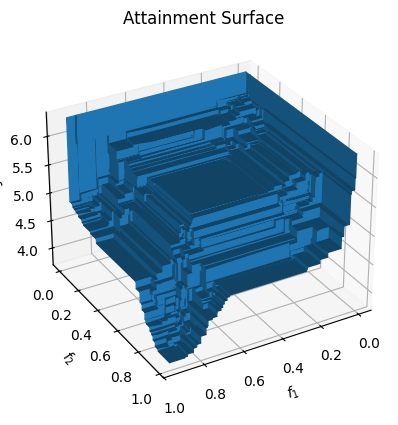

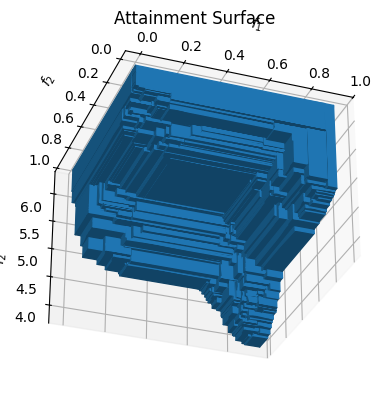

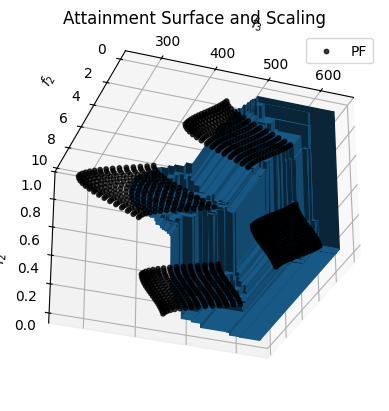

In [4]:
%%time
# Get the final generation from one of the 3D runs
last_pop = exp.runs[1].reports[-1]

# Plot the objectives with Pareto front
fig, ax = population_obj_scatter(last_pop, problem=exp.runs[1].problem)
ax.view_init(30, 30)
plt.title("Last Population")

# Plot the attainment surface in 3D
fig, ax = population_obj_scatter(last_pop, show_attainment=True, show_points=False)
ax.view_init(30, 60)
plt.title("Attainment Surface")

# Another angle
fig, ax = population_obj_scatter(last_pop, show_attainment=True, show_points=False)
ax.view_init(-30, 250)
plt.title("Attainment Surface")

# Show in reference to the PF and scale
fig, ax = population_obj_scatter(
    last_pop, problem=exp.runs[1].problem, show_attainment=True, show_points=False, scale=(1, 10, 100), flip_objs=True
)
ax.view_init(-30, 250)
plt.title("Attainment Surface and Scaling")

## Decision Variables
This cell shows the creation of a pair plot of the decision variables.

Text(0.5, 0.98, 'Remove Dominated Individuals')

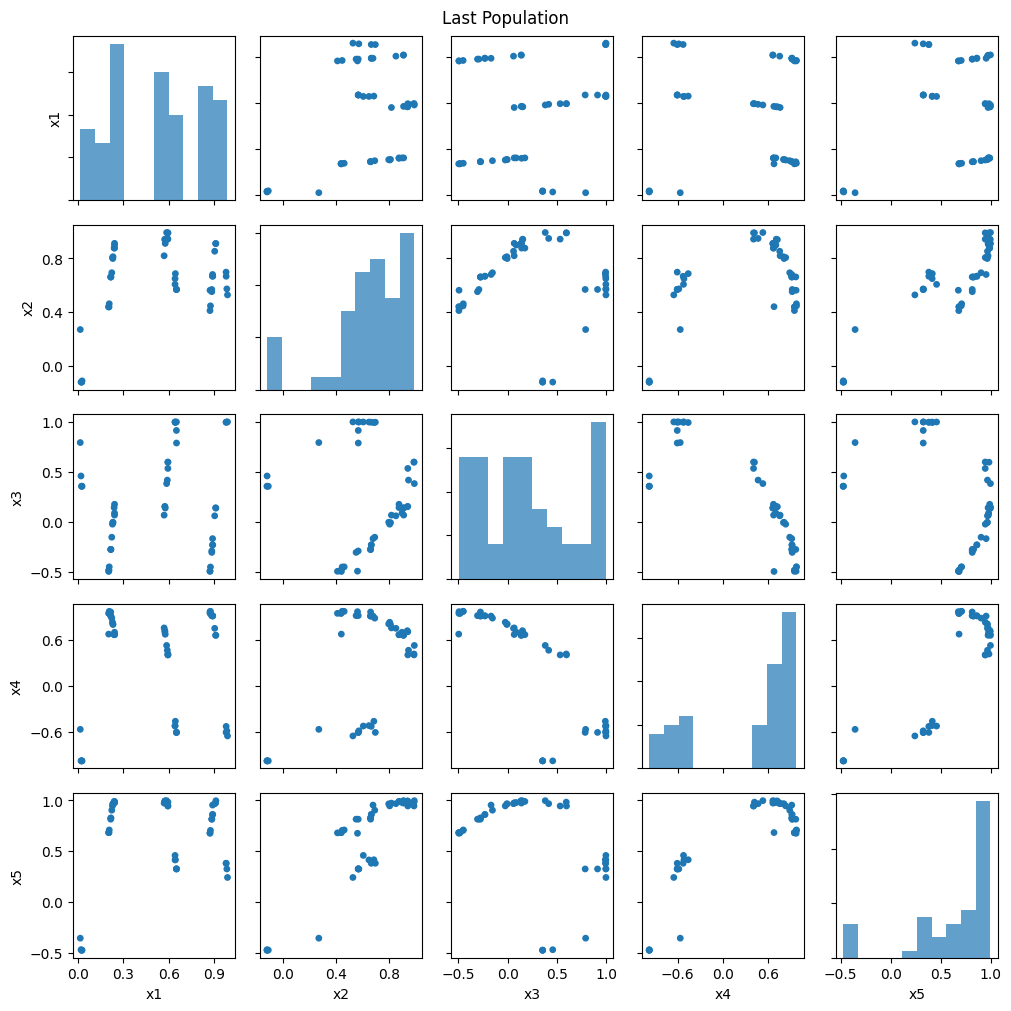

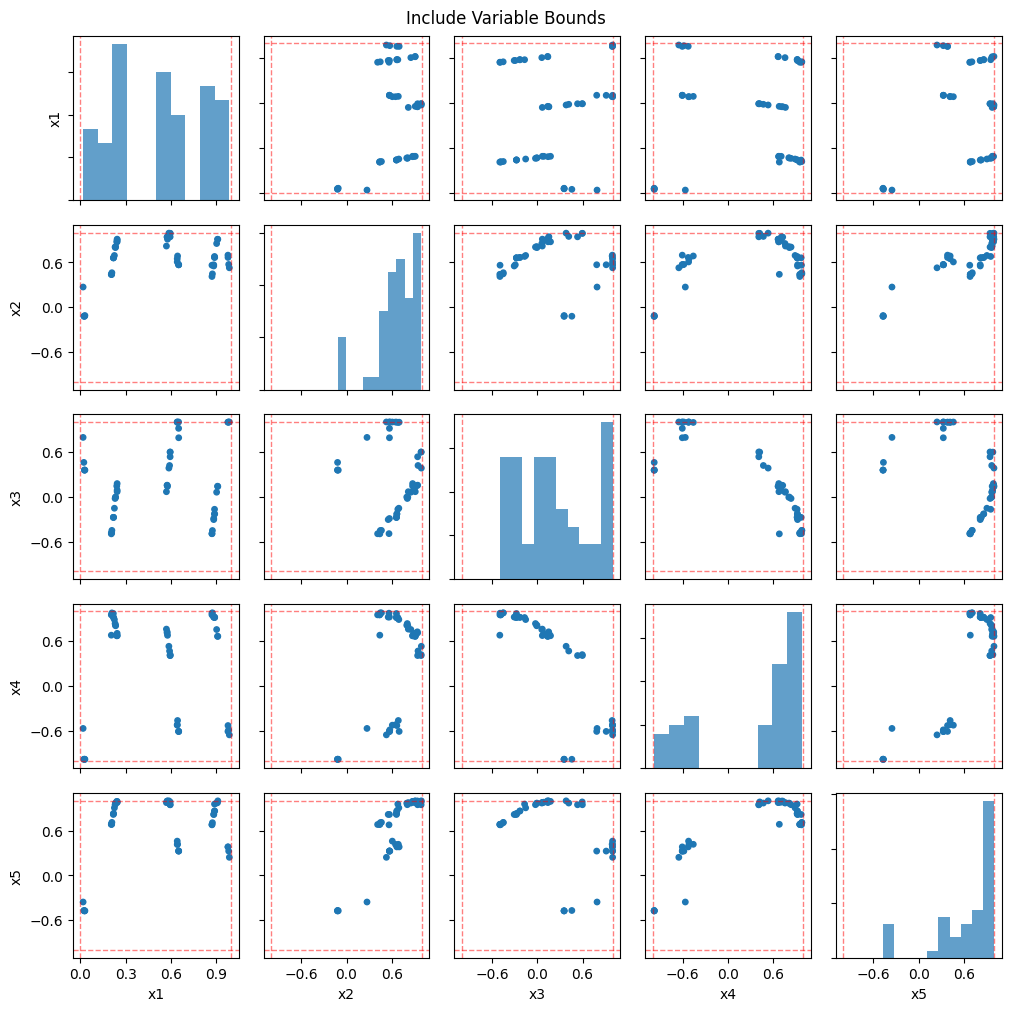

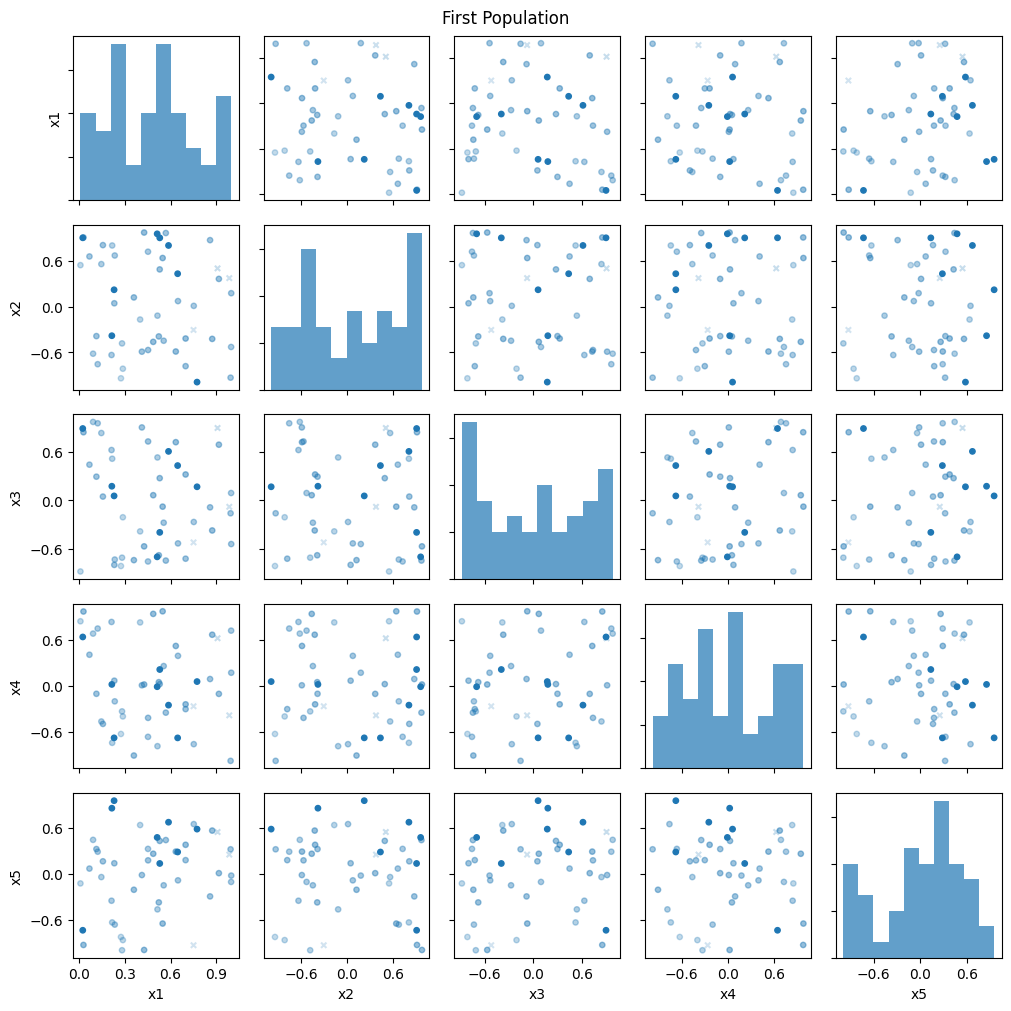

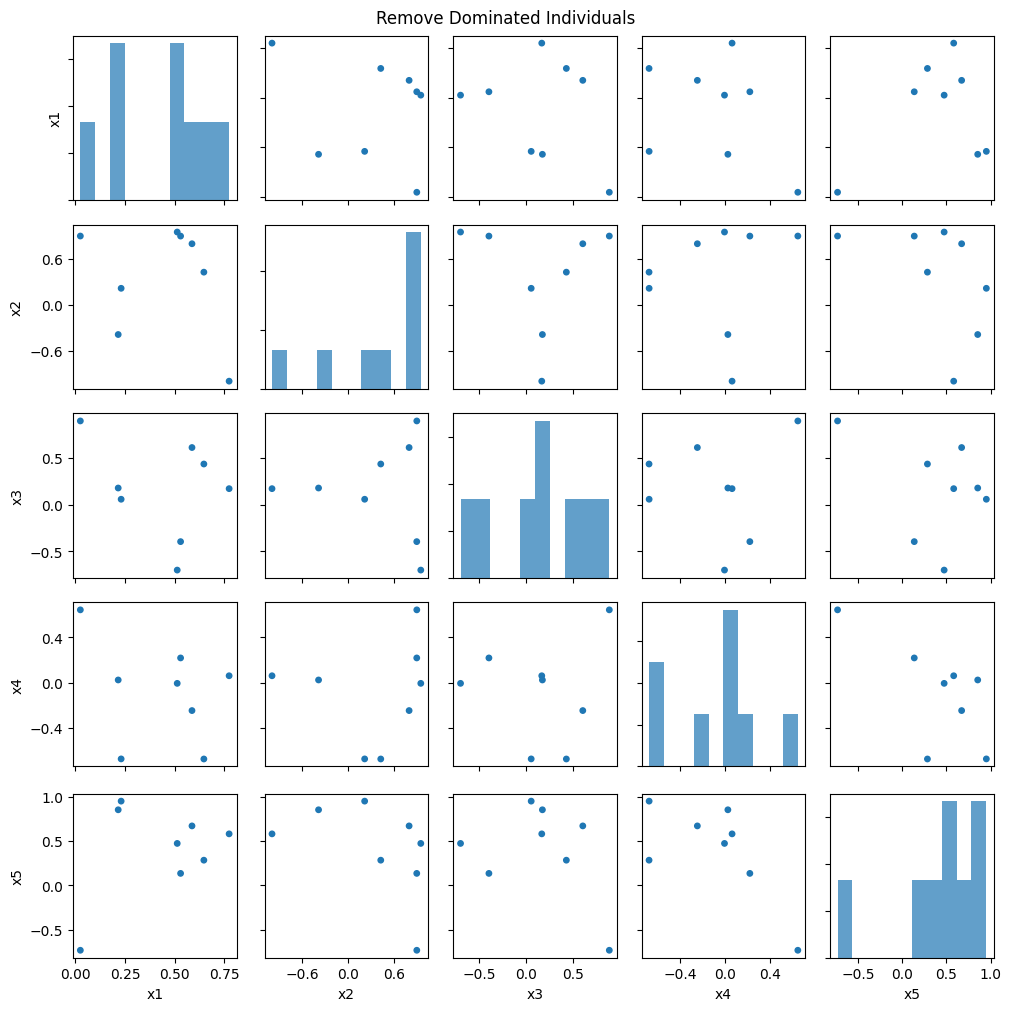

In [5]:
last_pop = exp.runs[0].reports[-1]
fig, axes = population_dvar_pairs(last_pop)
plt.suptitle("Last Population")

fig, axes = population_dvar_pairs(last_pop, problem=exp.runs[0].problem)
plt.suptitle("Include Variable Bounds")

fig, axes = population_dvar_pairs(first_pop)
plt.suptitle("First Population")

fig, axes = population_dvar_pairs(first_pop, domination_filt="non-dominated")
plt.suptitle("Remove Dominated Individuals")

Text(0.5, 0.98, 'Rescale the Variables')

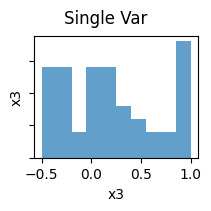

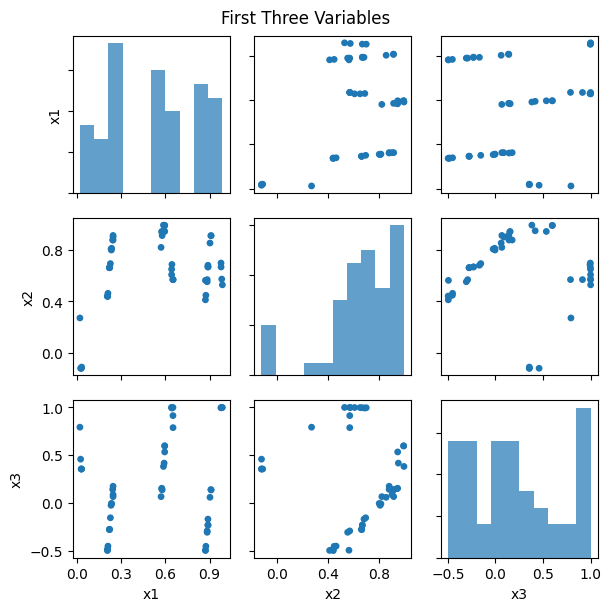

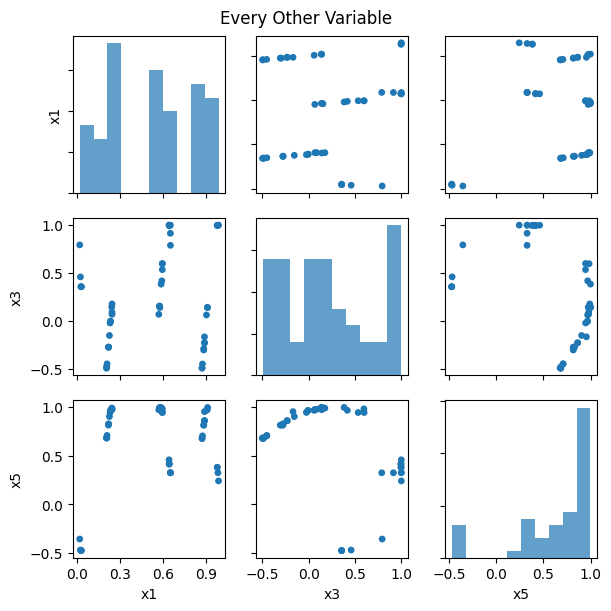

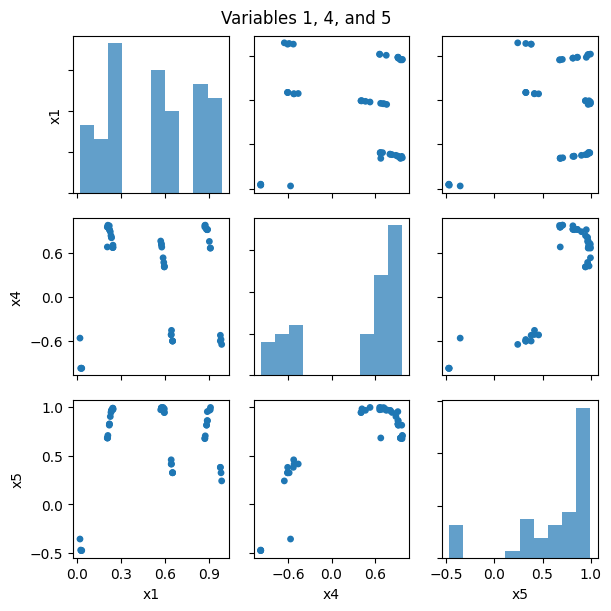

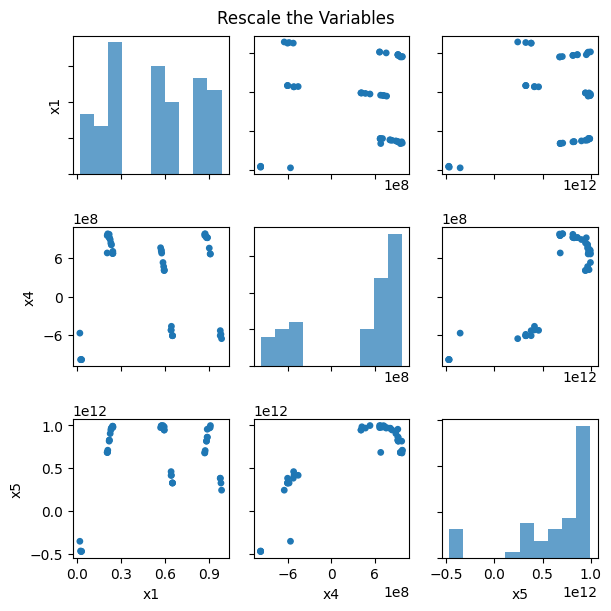

In [6]:
# Demonstrate selecting specific decision variables
last_pop = exp.runs[0].reports[-1]
fig, axes = population_dvar_pairs(last_pop, dvars=2)
plt.suptitle("Single Var")

fig, axes = population_dvar_pairs(last_pop, dvars=(0, 3))
plt.suptitle("First Three Variables")

fig, axes = population_dvar_pairs(last_pop, dvars=slice(0, 6, 2))
plt.suptitle("Every Other Variable")

fig, axes = population_dvar_pairs(last_pop, dvars=[0, 3, 4])
plt.suptitle("Variables 1, 4, and 5")

fig, axes = population_dvar_pairs(last_pop, dvars=[0, 3, 4], scale=(1, 1e3, 1e6, 1e9, 1e12))
plt.suptitle("Rescale the Variables")